# History of the Relations Between Supervisors and Students

In [1]:
import pandas as pd

In [2]:
supervision_df = pd.read_csv('relations.csv')
# supervision_df.drop_duplicates(inplace=True)
supervision_df.reset_index(drop=True, inplace=True)
supervision_df.head(10)

,supervisor,student
0,A. Carl Helmholz,Kent Terwilliger
1,A. Carl Helmholz,Lawrence W. Jones
2,A. Carl Helmholz,Barry Barish
3,A. David Buckingham,Brian Orr
4,A. David Buckingham,Laurence D. Barron
5,A. P. Balachandran,Pierre Ramond
6,Aaron Courville,Ian Goodfellow
7,Abba Lerner,Robert Fogel
8,Abdus Salam,John R. Taylor
9,Abdus Salam,Yuval Ne'eman


Number of unique people in the dataset

In [3]:
len(set(supervision_df.student.tolist() + supervision_df.supervisor.tolist()))

7072

Number of unique students in the dataset

In [4]:
len(supervision_df.student.unique())

6519

Number of unique supervisors in the dataset

In [5]:
len(supervision_df.supervisor.unique())

2864

## TODO

- Set attributes for each (i.e. person) such as field, birthday, gender etc
- Interesting to see if the different components are associated with different fields, countries, generations...
- Study how small we can make the seed and still manage to connect most people, as well as discovering who are the most important nodes
- Homophily, how likely two people that have the same attribute are linked?
- ~~Remove duplicated with similar names searching for names that match in high percentage (e.g. Robert Solow and Robert M. Solow)~~

## Build the Graph

In [6]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
from operator import itemgetter
from community import community_louvain

In [7]:
graph = nx.from_pandas_edgelist(supervision_df, 'supervisor', 'student', edge_attr=None, create_using = nx.Graph())
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 7072
Number of edges: 8115
Average degree:   2.2950


In [8]:
print("Network sparsity: %.4f" %nx.density(graph))

Network sparsity: 0.0003


In [9]:
comp = list(nx.connected_components(graph))
print('The graph contains', len(comp), 'connected components')

The graph contains 84 connected components


In [10]:
largest_comp = max(comp, key=len)
percentage_lcc = len(largest_comp)/ graph.number_of_nodes() * 100
print('The largest component has ', len(largest_comp), 'nodes', 'accounting for %.2f'% percentage_lcc, '% of the nodes')

The largest component has  6776 nodes accounting for 95.81 % of the nodes


In [11]:
path = nx.shortest_path(graph, source="Albert Einstein", target="Richard Feynman")
print("Shortest path between Einstein and Feynman:", path)

Shortest path between Einstein and Feynman: ['Albert Einstein', 'Hans Reichenbach', 'Arnold Sommerfeld', 'Karl Herzfeld', 'John Archibald Wheeler', 'Richard Feynman']


In [12]:
# WARNING: It is computationally expensive
# take the largest component and analyse its diameter = longest shortest path 
# lcc_graph = graph.subgraph(largest_comp)
# diameter = nx.diameter(lcc_graph)
# print("The diameter of the largest component is", diameter)

In [13]:
print('%.3f'%nx.transitivity(graph))

0.015


In [14]:
degrees = dict(graph.degree(graph.nodes()))
sorted_degree = sorted(degrees.items(), key=itemgetter(1), reverse=True)

# And the top 10 most popular
for person, degree in sorted_degree[:10]:
    print(person, ' knows ', degree, ' people')

Arnold Sommerfeld  knows  44  people
David Hilbert  knows  37  people
Dimitris Bertsimas  knows  34  people
Robert Solow  knows  30  people
Max Born  knows  29  people
Felix Klein  knows  28  people
Alonzo Church  knows  27  people
Franz Boas  knows  27  people
Abdus Salam  knows  25  people
J. J. Thomson  knows  24  people


In [27]:
# And the top 10 most popular
for person, degree in sorted_degree[:50]:
    print(person, ' knows ', degree, ' people')

Arnold Sommerfeld  knows  44  people
David Hilbert  knows  37  people
Dimitris Bertsimas  knows  34  people
Robert Solow  knows  30  people
Max Born  knows  29  people
Felix Klein  knows  28  people
Alonzo Church  knows  27  people
Franz Boas  knows  27  people
Abdus Salam  knows  25  people
J. J. Thomson  knows  24  people
Robert Bunsen  knows  23  people
John Archibald Wheeler  knows  23  people
Justus Liebig  knows  23  people
Walther Nernst  knows  22  people
Karl Weierstrass  knows  21  people
Enrico Fermi  knows  21  people
Marvin Minsky  knows  20  people
Andrey Kolmogorov  knows  20  people
Carl Gauss  knows  20  people
Ernst Kummer  knows  20  people
Salomon Bochner  knows  19  people
Hermann Helmholtz  knows  19  people
Manuel Blum  knows  19  people
Richard Karp  knows  18  people
Werner Heisenberg  knows  18  people
Chen Xingshen  knows  18  people
Weierstraß  knows  18  people
Karl Weierstraß  knows  18  people
Solomon Lefschetz  knows  18  people
Max Planck  knows  17  pe

Note: this is an undirected graph. If you were to have a directed one, use separate metrics for indegree and outdegree.

Text(0.5, 1.0, 'Degree distribution for the network')

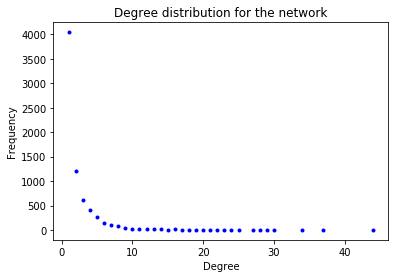

In [15]:
degree_seq = [d[1] for d in sorted_degree]
degreeCount = collections.Counter(degree_seq)
degreeCount = pd.DataFrame.from_dict(degreeCount, orient='index').reset_index()
fig = plt.figure()
ax = plt.gca()
ax.plot(degreeCount['index'], degreeCount[0], 'o', c='blue', markeredgecolor='none', markersize= 4)
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.title('Degree distribution for the network')

In [20]:
# WARNING: It's computationally expensive
betweenness = nx.betweenness_centrality(graph)
# Assign each to an attribute in your network
nx.set_node_attributes(graph, betweenness, 'betweenness')
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)

for person, bw in sorted_betweenness[:10]:
    print(person, ' has betweeness: %.3f' %bw)

David Hilbert  has betweeness: 0.158
Max Born  has betweeness: 0.153
Hans Reichenbach  has betweeness: 0.120
Arnold Sommerfeld  has betweeness: 0.119
Hermann Helmholtz  has betweeness: 0.085
E. H. Moore  has betweeness: 0.072
J. J. Thomson  has betweeness: 0.071
Solomon Lefschetz  has betweeness: 0.070
John von Neumann  has betweeness: 0.058
Ludwig Boltzmann  has betweeness: 0.056


In [18]:
partition = community_louvain.best_partition(graph)
# add it as an attribute to the nodes
for n in graph.nodes:
    graph.nodes[n]["louvain"] = partition[n]

In [21]:
cluster = partition['Claude Shannon']
# Take all the nodes that belong to the cluster
members_c = [q for q in graph.nodes if partition[q] == cluster]
for person in members_c:
    print(person)

Marvin Minsky
Avrim Blum
Shuchi Chawla
Katrina Ligett
John Langford (computer scientist)
Santosh Vempala
Adam Tauman Kalai
Axel Thue
Thoralf Skolem
Berthold K. P. Horn
Matthew T. Mason
Shahriar Negahdaripour
Michael A. Gennert
Marc Raibert
Carl Hewitt
Irene Greif
Akinori Yonezawa
Gul Agha (computer scientist)
Henry Baker (computer scientist)
William Clinger (computer scientist)
Claude Shannon
Ivan Sutherland
W. Daniel Hillis
Bert Sutherland
Danny Hillis
David Park (computer scientist)
Mike Paterson
David Waltz
Ron Sun
Stephen E. Cross
Tim Finin
Donald Knuth
Vaughan Pratt
Michael Fredman
Robert Tarjan
Scott Kim
Andrei Broder
Jeffrey Vitter
Robert Sedgewick (computer scientist)
Leonidas J. Guibas
Elling Holst
Frank Lauren Hitchcock
Frank Smithies
Dona Strauss
Graham Allan
Seymour Papert
John Robert Ringrose
Edward Norman Dancer
Trevor West
Gerald Sussman
David A. McAllester
Scott Fahlman
Ken Forbus
Guy L. Steele Jr.
Thomas Ransford
Hartley Rogers Jr.
James H. Clark
Henri Gouraud (compute

People with the most number of bridge edges

In [16]:
pd.DataFrame(list(nx.bridges(graph))).rename(columns={0: 'src', 1: 'dst'}).groupby('src').count().sort_values(by='dst', ascending=False).head(20)

,dst
src,
Dimitris Bertsimas,32
Franz Boas,25
Robert Solow,21
Alonzo Church,19
Arnold Sommerfeld,19
David Hilbert,18
John Archibald Wheeler,16
Felix Klein,15
Salomon Bochner,14
